### Creating ics file for MEM orientation schedule

#### Scraping website for MEM specific events
* https://sites.duke.edu/mgmt/new-student-orientation

In [223]:
from requests_html import HTMLSession
s = HTMLSession()
url = "https://sites.duke.edu/mgmt/new-student-orientation/"
r = s.get(url)
pages = r.html.find('div.entry-content ul a')

In [224]:
page_link = []

for i in pages:
    (link,) = i.absolute_links
    page_link.append(link)
    

In [225]:
page_link

['https://sites.duke.edu/mgmt/new-student-orientation/mem-orientation-day-1-monday-august-22-2022/',
 'https://sites.duke.edu/mgmt/mem-orientation-day-2-tuesday-august-23-2022/',
 'https://sites.duke.edu/mgmt/new-student-orientation/mem-orientation-day-3-wednesday-august-24-2022/',
 'https://sites.duke.edu/mgmt/new-student-orientation/mem-orientation-day-4-thursday-august-25-2022/',
 'https://sites.duke.edu/mgmt/new-student-orientation/mem-orientation-day-5-friday-august-26-2022/']

In [226]:
import re


In [227]:
extract = []

def get_details(url,date):
    r = s.get(url)
    pages = r.html.find('div.entry-content p')
    for i in pages:
        extract.append([i.text,date])

In [228]:
# Run below to extract events for all 5 days
for i in page_link:
    match = re.search(r'(?<=august).*(?=\/)',i)
    date = '08'+match[0]
    get_details(i,date)

#### Clean extracted text

In [314]:
import pandas as pd

In [315]:
df = pd.DataFrame(extract)

In [316]:
df.rename(columns = {0:'text',1:'date'}, inplace = True)
df['text'][4]

'Academic Overview & Curriculum Tracks\n1:30 p.m. – 3:00 p.m. | Biological Sciences Building, Room 111\nPresenters: Allyson Jones, Academic Coordinator, Master of Engineering Management\nLuis Morales, Executive Director, Master of Engineering Management and Adjunct Associate Professor'

In [318]:
# Extract respective details
df[["event","time","extract"]] = df["text"].str.split('\n',n=2,expand= True)
df[["time","location"]] = df["time"].str.split('|',expand= True)
df["group"] = df["extract"].str.extract('(?=Groups)(.*)(?=\\n)', expand=False).str.strip()
df["optional"] = df["extract"].str.extract('(?=\()(.*)(?<=\))', expand=False).str.strip()
df["presenter"]= df["extract"].str.extract('(?=Presenter)(.*)', expand=False).str.strip()

#clean
df["extract"] = df["extract"].str.replace('(?=Groups)(.*)(?=\\n)','')
df["extract"] = df["extract"].str.replace('(?=\()(.*)(?<=\))','')
df["extract"] = df["extract"].str.replace(r'\n', ' ')
#df["extract"] = df["extract"].str.replace('(?=Presenter)(.*)','')
#df["extract"] = df["extract"].str.replace(r'\n', '')

/tmp/ipykernel_36900/1251108.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df["extract"] = df["extract"].str.replace('(?=Groups)(.*)(?=\\n)','')
/tmp/ipykernel_36900/1251108.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df["extract"] = df["extract"].str.replace('(?=\()(.*)(?<=\))','')
/tmp/ipykernel_36900/1251108.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df["extract"] = df["extract"].str.replace(r'\n', ' ')


In [188]:
pd.set_option('display.max_colwidth', None)


In [322]:
df.to_csv('event.csv')

In [325]:
df.to_excel('event_list.xlsx')

In [324]:
df

,text,date,event,time,extract,location,group,optional,presenter
0,MEM Principle: Teamwork – Leading and contributing to high performing teams,08-22-2022,MEM Principle: Teamwork – Leading and contributing to high performing teams,None,None,None,None,None,None
1,"Engineering Master’s Programs Community Building Event\n9:00 a.m. – 11:00 a.m. | Gross Hall 107\nExperience orientation in a fun and competitive way! This team-based programming will have you learning about the Pratt School of Engineering and exploring Duke’s campus as you complete missions and earn points. Prizes will be awarded to the top team. Wear comfortable shoes and attire appropriate for the weather. If it happens to rain, an umbrella will be handy! Please download the GooseChase IOS or Android app ahead of time from: https://www.goosechase.com/download/",08-22-2022,Engineering Master’s Programs Community Building Event,9:00 a.m. – 11:00 a.m.,"Experience orientation in a fun and competitive way! This team-based programming will have you learning about the Pratt School of Engineering and exploring Duke’s campus as you complete missions and earn points. Prizes will be awarded to the top team. Wear comfortable shoes and attire appropriate for the weather. If it happens to rain, an umbrella will be handy! Please download the GooseChase IOS or Android app ahead of time from: https://www.goosechase.com/download/",Gross Hall 107,NaN,NaN,NaN
2,"Engineering Master’s Programs Check-in and Social\n11:00 a.m. – 12:00 p.m. | Harrington Engineering Quadrangle\nMeet staff, faculty, and students from the Engineering Master’s Programs on the Harrington Engineering Quadrangle to enjoy a cold treat while you network with your new community. We will also have a photo opportunity, lawn games, and grab-and-go meals.",08-22-2022,Engineering Master’s Programs Check-in and Social,11:00 a.m. – 12:00 p.m.,"Meet staff, faculty, and students from the Engineering Master’s Programs on the Harrington Engineering Quadrangle to enjoy a cold treat while you network with your new community. We will also have a photo opportunity, lawn games, and grab-and-go meals.",Harrington Engineering Quadrangle,NaN,NaN,NaN
3,"Director’s Welcome\n1:00 p.m. – 1:30 p.m. | Biological Sciences Building, Room 111\nPresenter: Luis Morales, Executive Director, Master of Engineering Management and Adjunct Associate Professor",08-22-2022,Director’s Welcome,1:00 p.m. – 1:30 p.m.,"Presenter: Luis Morales, Executive Director, Master of Engineering Management and Adjunct Associate Professor","Biological Sciences Building, Room 111",NaN,NaN,"Presenter: Luis Morales, Executive Director, Master of Engineering Management and Adjunct Associate Professor"
4,"Academic Overview & Curriculum Tracks\n1:30 p.m. – 3:00 p.m. | Biological Sciences Building, Room 111\nPresenters: Allyson Jones, Academic Coordinator, Master of Engineering Management\nLuis Morales, Executive Director, Master of Engineering Management and Adjunct Associate Professor",08-22-2022,Academic Overview & Curriculum Tracks,1:30 p.m. – 3:00 p.m.,"Presenters: Allyson Jones, Academic Coordinator, Master of Engineering Management Luis Morales, Executive Director, Master of Engineering Management and Adjunct Associate Professor","Biological Sciences Building, Room 111",NaN,NaN,"Presenters: Allyson Jones, Academic Coordinator, Master of Engineering Management"
5,"Meet Your SLAM Team\n3:00 p.m. – 5:30 p.m. | See breakout schedule\nGather with your SLAM Team to get answers to questions related to the MEM program, university resources, and things to do in Durham. Your SLAM Team leader will continue to act as an advisor for your group during your first few weeks of school. You can read more about the 2022 SLAM Team leaders here.\n\nPresenter: Rachel Mwombela, Assistant Director of Student Services, Master of Engineering Management",08-22-2022,Meet Your SLAM Team,3:00 p.m. – 5:30 p.m.,"Gather with your SLAM Team to get answers to questions related to the MEM program, university

#### GPSG events

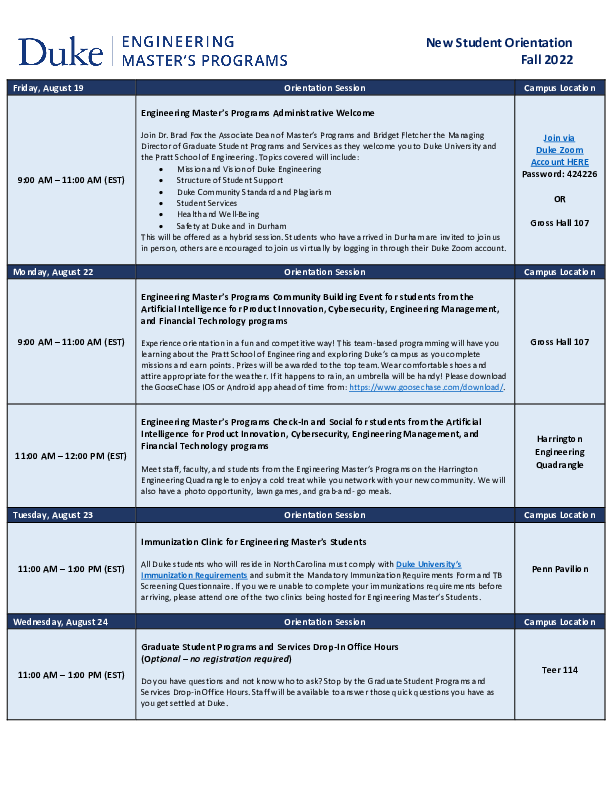

In [137]:
import pdfplumber

file = "/home/venkat/Downloads/Fall 2022 Orientation Schedule - MEM Program.pdf"

pdf = pdfplumber.open(file)
p0 = pdf.pages[0]
im = p0.to_image()
im

In [138]:
table = p0.extract_table()

In [139]:
import pandas as pd
df = pd.DataFrame(table)

In [140]:
df

,0,1,2,3,4,5,6,7,8
0,,"Friday, August 19",,,Orientation Session,,,Campus Location,
1,9:00 AM – 11:00 AM (EST),None,None,,,,Join via \nDuke Zoom \nAccount HERE \nPasswor...,None,None
2,None,None,None,None,Engineering Master’s Programs Administrative W...,None,None,None,None
3,None,None,None,None,,None,None,None,None
4,None,None,None,None,Join Dr. Brad Fox the Associate Dean of Master...,None,None,None,None
5,None,None,None,None,Director of Graduate Student Programs and Serv...,None,None,None,None
6,None,None,None,None,the Pratt School of Engineering. Topics covere...,None,None,None,None
7,None,None,None,None, Mission and Vision of Duke Engineering,None,None,None,None
8,None,None,None,None, Structure of Student Support,None,None,None,None
9,None,None,None,None, Duke Community Standard and Plagiarism,None,None,None,None


In [141]:
pdf = pdfplumber.open(file)
p0 = pdf.pages[1]
im = p0.to_image()
table = p0.extract_table()
df2 = pd.DataFrame(table)

In [142]:
df = df.append(df2)

/tmp/ipykernel_65127/948459739.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


In [143]:
df = df[[0,1,4,6]]

In [145]:
df = df.reset_index(drop=True)
df['event'] = ''
for index, row in df.iterrows():
    if (df[0][index]!=None and df[0][index]!='') and (index>0 and index <101):
        df[1][index] = df[1][index-1]
        df[1][index-1] = ''
        df[4][index-1] = ''
        df['event'][index] = df[4][index+1]
        df[4][index+1] = ''

In [159]:
df.head()

,0,1,4,6,event
0,9:00 AM – 11:00 AM (EST),"Friday, August 19",,Join via \nDuke Zoom \nAccount HERE \nPasswor...,Engineering Master’s Programs Administrative W...
1,None,None,,None,
2,None,None,,None,
3,None,None,Join Dr. Brad Fox the Associate Dean of Master...,None,
4,None,None,Director of Graduate Student Programs and Serv...,None,


In [153]:
df = df[df[0]!='']

In [158]:
df = df.reset_index(drop=True)

In [162]:
df['flag'] = 0
df['flag'][0] = 1
for index, row in df.iterrows():
    if (df[0][index]!=None and df[0][index]!='') and (index>0 and index <101):
        df['flag'][index] = df['flag'][index-1] + 1
        
    elif index>0 and index<101:
        df['flag'][index] = df['flag'][index-1]

/tmp/ipykernel_65127/2286761456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'][0] = 1
/tmp/ipykernel_65127/2286761456.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'][index] = df['flag'][index-1]
/tmp/ipykernel_65127/2286761456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'][index] = df['flag'][index-1] + 1


In [166]:
df.head(30)

,0,1,4,6,event,flag
0,9:00 AM – 11:00 AM (EST),"Friday, August 19",,Join via \nDuke Zoom \nAccount HERE \nPasswor...,Engineering Master’s Programs Administrative W...,1
1,None,None,,None,,1
2,None,None,,None,,1
3,None,None,Join Dr. Brad Fox the Associate Dean of Master...,None,,1
4,None,None,Director of Graduate Student Programs and Serv...,None,,1
5,None,None,the Pratt School of Engineering. Topics covere...,None,,1
6,None,None, Mission and Vision of Duke Engineering,None,,1
7,None,None, Structure of Student Support,None,,1
8,None,None, Duke Community Standard and Plagiarism,None,,1
9,None,None, Student Services,None,,1


In [172]:
df = df.fillna(value='')


KeyError: 'flag'

In [170]:
df[4].groupby(['flag']).apply(' '.join).reset_index()

,0,1,4,6,event,flag
0,9:00 AM – 11:00 AM (EST),"Friday, August 19",,Join via \nDuke Zoom \nAccount HERE \nPasswor...,Engineering Master’s Programs Administrative W...,1
1,,,,,,1
2,,,,,,1
3,,,Join Dr. Brad Fox the Associate Dean of Master...,,,1
4,,,Director of Graduate Student Programs and Serv...,,,1
...,...,...,...,...,...,...
91,,,This is your chance to mingle and unwind after...,,,10
92,,,Council (EGSC) on the Harrington Engineering Q...,,,10
93,,,alcoholic or non-alcoholic beverage will be pr...,,,10
94,,,Duke IDs.,,,10


In [178]:
x = df[[4,'flag']]
x.groupby('flag')

In [190]:
desc = x.groupby(['flag'])[4].apply(lambda x: ' '.join(x)).reset_index()
desc[4] = desc[4].str.strip()

In [198]:
event = df[df[0]!='']

In [199]:
event = event.reset_index(drop=True)

In [201]:
for i in range(len(event)):
    if(event[1][i]==''):
        event[1][i] = event[1][i-1]

/tmp/ipykernel_65127/1181558656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event[1][i] = event[1][i-1]


In [203]:
event[6] = event[6].str.replace('\n','')

In [206]:
event[1] =  f'2022-08-' + event[1].str.replace('\D','')

/tmp/ipykernel_65127/2349188792.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  event[1] =  f'2022-08-' + event[1].str.replace('\D','')


In [214]:
event[0] = event[0].str.replace('EST','').str.strip()

/tmp/ipykernel_65127/3951018451.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  event[0] = event[0].str.replace('\(EST\)','').str.strip()


In [216]:
event[0] = event[0].str.replace('\(\)','').str.strip()

/tmp/ipykernel_65127/1415932860.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  event[0] = event[0].str.replace('\(\)','').str.strip()


In [223]:
event[["start","end"]] =  event[0].str.split('–' ,expand= True)

In [225]:
event["start"] = event[1] + " " + event["start"].str.strip()

In [227]:
event["end"] = event[1] + " " + event["end"].str.strip()

In [229]:
event.rename(columns = {6:'location'}, inplace = True)
event = event[["location","event","flag","start","end"]]

In [230]:
event.head()

,location,event,flag,start,end
0,Join via Duke Zoom Account HERE Password: 424226 OR Gross Hall 107,Engineering Master’s Programs Administrative Welcome,1,2022-08-19 9:00 AM,2022-08-19 11:00 AM
1,Gross Hall 107,Engineering Master’s Programs Community Building Event for students from the,2,2022-08-22 9:00 AM,2022-08-22 11:00 AM
2,Harrington Engineering Quadrangle,Engineering Master’s Programs Check-In and Social for students from the Artificial,3,2022-08-22 11:00 AM,2022-08-22 12:00 PM
3,Penn Pavilion,Immunization Clinic for Engineering Master’s Students,4,2022-08-23 11:00 AM,2022-08-23 1:00 PM
4,Teer 114,Graduate Student Programs and Services Drop-In Office Hours,5,2022-08-24 11:00 AM,2022-08-24 1:00 PM


In [231]:
desc.head()

,flag,4
0,1,"Join Dr. Brad Fox the Associate Dean of Master’s Programs and Bridget Fletcher the Managing Director of Graduate Student Programs and Services as they welcome you to Duke University and the Pratt School of Engineering. Topics covered will include:  Mission and Vision of Duke Engineering  Structure of Student Support  Duke Community Standard and Plagiarism  Student Services  Health and Well-Being  Safety at Duke and in Durham This will be offered as a hybrid session. Students who have arrived in Durham are invited to join us in person, others are encouraged to join us virtually by logging in through their Duke Zoom account."
1,2,"Artificial Intelligence for Product Innovation, Cybersecurity, Engineering Management, and Financial Technology programs Experience orientation in a fun and competitive way! This team-based programming will have you learning about the Pratt School of Engineering and exploring Duke’s campus as you complete missions and earn points. Prizes will be awarded to the top team. Wear comfortable shoes and attire appropriate for the weather. If it happens to rain, an umbrella will be handy! Please download the GooseChase IOS or Android app ahead of time from: https://www.goosechase.com/download/."
2,3,"Intelligence for Product Innovation, Cybersecurity, Engineering Management, and Financial Technology programs Meet staff, faculty, and students from the Engineering Master’s Programs on the Harrington Engineering Quadrangle to enjoy a cold treat while you network with your new community. We will also have a photo opportunity, lawn games, and grab-and- go meals."
3,4,"All Duke students who will reside in North Carolina must comply with Duke University’s Immunization Requirements and submit the Mandatory Immunization Requirements Form and TB Screening Questionnaire. If you were unable to complete your immunizations requirements before arriving, please attend one of the two clinics being hosted for Engineering Master’s Students."
4,5,(Optional – no registration required) Do you have questions and not know who to ask? Stop by the Graduate Student Programs and Services Drop-in Office Hours. Staff will be available to answer those quick questions you have as you get settled at Duke.


In [233]:
schedule = pd.merge(event,desc)

In [240]:
schedule["st"] = pd.to_datetime(schedule["start"])
schedule["en"] = pd.to_datetime(schedule["end"])

In [249]:
schedule["st"] = schedule.st.dt.strftime('%Y%m%dT%H%M%S')

In [250]:
schedule["en"] = schedule.en.dt.strftime('%Y%m%dT%H%M%S')

In [251]:
schedule

,location,event,flag,start,end,4,st,en
0,Join via Duke Zoom Account HERE Password: 424226 OR Gross Hall 107,Engineering Master’s Programs Administrative Welcome,1,2022-08-19 9:00 AM,2022-08-19 11:00 AM,"Join Dr. Brad Fox the Associate Dean of Master’s Programs and Bridget Fletcher the Managing Director of Graduate Student Programs and Services as they welcome you to Duke University and the Pratt School of Engineering. Topics covered will include:  Mission and Vision of Duke Engineering  Structure of Student Support  Duke Community Standard and Plagiarism  Student Services  Health and Well-Being  Safety at Duke and in Durham This will be offered as a hybrid session. Students who have arrived in Durham are invited to join us in person, others are encouraged to join us virtually by logging in through their Duke Zoom account.",20220819T090000,20220819T110000
1,Gross Hall 107,Engineering Master’s Programs Community Building Event for students from the,2,2022-08-22 9:00 AM,2022-08-22 11:00 AM,"Artificial Intelligence for Product Innovation, Cybersecurity, Engineering Management, and Financial Technology programs Experience orientation in a fun and competitive way! This team-based programming will have you learning about the Pratt School of Engineering and exploring Duke’s campus as you complete missions and earn points. Prizes will be awarded to the top team. Wear comfortable shoes and attire appropriate for the weather. If it happens to rain, an umbrella will be handy! Please download the GooseChase IOS or Android app ahead of time from: https://www.goosechase.com/download/.",20220822T090000,20220822T110000
2,Harrington Engineering Quadrangle,Engineering Master’s Programs Check-In and Social for students from the Artificial,3,2022-08-22 11:00 AM,2022-08-22 12:00 PM,"Intelligence for Product Innovation, Cybersecurity, Engineering Management, and Financial Technology programs Meet staff, faculty, and students from the Engineering Master’s Programs on the Harrington Engineering Quadrangle to enjoy a cold treat while you network with your new community. We will also have a photo opportunity, lawn games, and grab-and- go meals.",20220822T110000,20220822T120000
3,Penn Pavilion,Immunization Clinic for Engineering Master’s Students,4,2022-08-23 11:00 AM,2022-08-23 1:00 PM,"All Duke students who will reside in North Carolina must comply with Duke University’s Immunization Requirements and submit the Mandatory Immunization Requirements Form and TB Screening Questionnaire. If you were unable to complete your immunizations requirements before arriving, please attend one of the two clinics being hosted for Engineering Master’s Students.",20220823T110000,20220823T130000
4,Teer 114,Graduate Student Programs and Services Drop-In Office Hours,5,2022-08-24 11:00 AM,2022-08-24 1:00 PM,(Optional – no registration required) Do you have questions and not know who to ask? Stop by the Graduate Student Programs and Services Drop-in Office Hours. Staff will be available to answer those quick questions you have as you get settled at Duke.,20220824T110000,20220824T130000
5,Penn Pavilion,Immunization Clinic for Engineering Master’s Students,6,2022-08-25 12:00 PM,2022-08-25 2:00 PM,"All Duke students who will reside in North Carolina must comply with Duke University’s Immunization Requirements and submit the Mandatory Immunization Requirements Form and TB Screening Questionnaire. If you were unable to complete your immunizations requirements before arriving, please attend one of the two clinics being hosted for Engineering Master’s Students.",20220825T120000,20220825T140000
6,Schiciano Auditorium,Drop-In Visa Registration for International Students,7,2022-08-26 1:00 PM,2022-08-26 3:00 PM,"All international student with a visa, enrolled in an on-campus program, and arriving at Duke for the first time this Fall must register with Duke Visa Services within 30 days of arriving in the United States. This visa registration session is for newly arriving Master o

In [259]:
y="venkat"

x = f'END:DAYLIGHT\n\
END:VTIMEZONE\n\
BEGIN:VEVENT {y}\n\
CLASS:PUBLIC\n'

with open('somefile.ics', 'a') as the_file:
    the_file.write(x)

In [280]:
import uuid
str(uuid.uuid4())

'9ab5a3ff-6db3-4fff-86f6-5b49589483b5'

In [412]:
begin ='BEGIN:VCALENDAR\n\
METHOD:PUBLISH\n\
X-MS-OLK-FORCEINSPECTOROPEN:TRUE\n\
BEGIN:VTIMEZONE\n\
TZID:Eastern Standard Time\n\
BEGIN:STANDARD\n\
DTSTART:16011104T020000\n\
RRULE:FREQ=YEARLY;BYDAY=1SU;BYMONTH=11\n\
TZOFFSETFROM:-0400\n\
TZOFFSETTO:-0500\n\
END:STANDARD\n\
BEGIN:DAYLIGHT\n\
DTSTART:16010311T020000\n\
RRULE:FREQ=YEARLY;BYDAY=2SU;BYMONTH=3\n\
TZOFFSETFROM:-0500\n\
TZOFFSETTO:-0400\n\
END:DAYLIGHT\n\
END:VTIMEZONE\n'

In [417]:
def write_event(event,start,end,location,desc,uid,file_name):

    body = f'BEGIN:VEVENT\n\
CLASS:PUBLIC\n\
CREATED:20220723T112448Z\n\
DESCRIPTION:{desc}\n\
DTEND;TZID="Eastern Standard Time":{end}\n\
DTSTAMP:20220723T112448Z\n\
DTSTART;TZID="Eastern Standard Time":{start}\n\
LOCATION:{location}\n\
PRIORITY:5\n\
SEQUENCE:0\n\
SUMMARY;LANGUAGE=en-us:{event}\n\
TRANSP:OPAQUE\n\
UID:{uid}\n\
END:VEVENT\n'
    with open(file_name, 'a+') as tf:
        tf.write(body)

In [414]:
ending='END:VCALENDAR'

In [346]:
file_name = 'gpsg_sch.ics'
with open(file_name, 'a') as the_file:
    the_file.write(begin)
for i in range(len(schedule)):    
    event = schedule['event'][i]
    start = schedule['st'][i]
    end = schedule['en'][i]
    location = schedule['location'][i]
    desc = schedule[4][i]
    uid = str(uuid.uuid4())
    write_event(event,start,end,location,desc,uid,file_name)
with open(file_name, 'a') as the_file:
    the_file.write(ending)

In [342]:
schedule.head()

,location,event,flag,start,end,4,st,en
0,Join via Duke Zoom Account HERE Password: 424226 OR Gross Hall 107,Engineering Master’s Programs Administrative Welcome,1,2022-08-19 9:00 AM,2022-08-19 11:00 AM,"Join Dr. Brad Fox the Associate Dean of Master’s Programs and Bridget Fletcher the Managing Director of Graduate Student Programs and Services as they welcome you to Duke University and the Pratt School of Engineering. Topics covered will include:  Mission and Vision of Duke Engineering  Structure of Student Support  Duke Community Standard and Plagiarism  Student Services  Health and Well-Being  Safety at Duke and in Durham This will be offered as a hybrid session. Students who have arrived in Durham are invited to join us in person, others are encouraged to join us virtually by logging in through their Duke Zoom account.",20220819T090000,20220819T110000
1,Gross Hall 107,Engineering Master’s Programs Community Building Event for students from the,2,2022-08-22 9:00 AM,2022-08-22 11:00 AM,"Artificial Intelligence for Product Innovation, Cybersecurity, Engineering Management, and Financial Technology programs Experience orientation in a fun and competitive way! This team-based programming will have you learning about the Pratt School of Engineering and exploring Duke’s campus as you complete missions and earn points. Prizes will be awarded to the top team. Wear comfortable shoes and attire appropriate for the weather. If it happens to rain, an umbrella will be handy! Please download the GooseChase IOS or Android app ahead of time from: https://www.goosechase.com/download/.",20220822T090000,20220822T110000
2,Harrington Engineering Quadrangle,Engineering Master’s Programs Check-In and Social for students from the Artificial,3,2022-08-22 11:00 AM,2022-08-22 12:00 PM,"Intelligence for Product Innovation, Cybersecurity, Engineering Management, and Financial Technology programs Meet staff, faculty, and students from the Engineering Master’s Programs on the Harrington Engineering Quadrangle to enjoy a cold treat while you network with your new community. We will also have a photo opportunity, lawn games, and grab-and- go meals.",20220822T110000,20220822T120000
3,Penn Pavilion,Immunization Clinic for Engineering Master’s Students,4,2022-08-23 11:00 AM,2022-08-23 1:00 PM,"All Duke students who will reside in North Carolina must comply with Duke University’s Immunization Requirements and submit the Mandatory Immunization Requirements Form and TB Screening Questionnaire. If you were unable to complete your immunizations requirements before arriving, please attend one of the two clinics being hosted for Engineering Master’s Students.",20220823T110000,20220823T130000
4,Teer 114,Graduate Student Programs and Services Drop-In Office Hours,5,2022-08-24 11:00 AM,2022-08-24 1:00 PM,(Optional – no registration required) Do you have questions and not know who to ask? Stop by the Graduate Student Programs and Services Drop-in Office Hours. Staff will be available to answer those quick questions you have as you get settled at Duke.,20220824T110000,20220824T130000


#### Creating MEM specific event list

In [364]:
sch = pd.read_excel('/home/venkat/Downloads/MEM Orientation ics/event_list.xlsx')

In [381]:
sch['time'] = sch['time'].fillna('7:00 a.m. – 8:00 a.m.')

In [385]:
sch['desc'] = (sch['extract'] + '\n' + sch['optional'].fillna('') + '\n' + sch['presenter'].fillna('')).fillna('')

In [391]:
sch['event_name'] = sch['event'] +  '  ' + sch['group'].fillna('')

In [393]:
sch[["start","end"]] =  sch['time'].str.split('–' ,expand= True)

In [398]:
sch["start"] = sch['date'] + " " + sch["start"].str.strip()
sch["end"] = sch['date'] + " " + sch["end"].str.strip()

In [404]:
sch["st"] = pd.to_datetime(sch["start"])
sch["st"] = sch.st.dt.strftime('%Y%m%dT%H%M%S')

In [408]:
sch["en"] = pd.to_datetime(sch["end"])

In [410]:
sch["en"] = sch.en.dt.strftime('%Y%m%dT%H%M%S')

In [411]:
sch

,date,event,time,extract,location,group,optional,presenter,desc,event_name,start,end,st,en
0,08-22-2022,MEM Principle: Teamwork – Leading and contributing to high performing teams,7:00 a.m. – 8:00 a.m.,NaN,NaN,NaN,NaN,NaN,,MEM Principle: Teamwork – Leading and contributing to high performing teams,08-22-2022 08-22-2022 7:00 a.m.,08-22-2022 8:00 a.m.,20220822T070000,20220822T080000
1,08-22-2022,Engineering Master’s Programs Community Building Event,9:00 a.m. – 11:00 a.m.,"Experience orientation in a fun and competitive way! This team-based programming will have you learning about the Pratt School of Engineering and exploring Duke’s campus as you complete missions and earn points. Prizes will be awarded to the top team. Wear comfortable shoes and attire appropriate for the weather. If it happens to rain, an umbrella will be handy! Please download the GooseChase IOS or Android app ahead of time from: https://www.goosechase.com/download/",Gross Hall 107,NaN,NaN,NaN,"Experience orientation in a fun and competitive way! This team-based programming will have you learning about the Pratt School of Engineering and exploring Duke’s campus as you complete missions and earn points. Prizes will be awarded to the top team. Wear comfortable shoes and attire appropriate for the weather. If it happens to rain, an umbrella will be handy! Please download the GooseChase IOS or Android app ahead of time from: https://www.goosechase.com/download/\n\n",Engineering Master’s Programs Community Building Event,08-22-2022 08-22-2022 9:00 a.m.,08-22-2022 11:00 a.m.,20220822T090000,20220822T110000
2,08-22-2022,Engineering Master’s Programs Check-in and Social,11:00 a.m. – 12:00 p.m.,"Meet staff, faculty, and students from the Engineering Master’s Programs on the Harrington Engineering Quadrangle to enjoy a cold treat while you network with your new community. We will also have a photo opportunity, lawn games, and grab-and-go meals.",Harrington Engineering Quadrangle,NaN,NaN,NaN,"Meet staff, faculty, and students from the Engineering Master’s Programs on the Harrington Engineering Quadrangle to enjoy a cold treat while you network with your new community. We will also have a photo opportunity, lawn games, and grab-and-go meals.\n\n",Engineering Master’s Programs Check-in and Social,08-22-2022 08-22-2022 11:00 a.m.,08-22-2022 12:00 p.m.,20220822T110000,20220822T120000
3,08-22-2022,Director’s Welcome,1:00 p.m. – 1:30 p.m.,NaN,"Biological Sciences Building, Room 111",NaN,NaN,"Presenter: Luis Morales, Executive Director, Master of Engineering Management and Adjunct Associate Professor",,Director’s Welcome,08-22-2022 08-22-2022 1:00 p.m.,08-22-2022 1:30 p.m.,20220822T130000,20220822T133000
4,08-22-2022,Academic Overview & Curriculum Tracks,1:30 p.m. – 3:00 p.m.,NaN,"Biological Sciences Building, Room 111",NaN,NaN,"Presenters: Allyson Jones, Academic Coordinator, Master of Engineering Management Luis Morales, Executive Director, Master of Engineering Management and Adjunct Associate Professor",,Academic Overview & Curriculum Tracks,08-22-2022 08-22-2022 1:30 p.m.,08-22-2022 3:00 p.m.,20220822T133000,20220822T150000
5,08-22-2022,Meet Your SLAM Team,3:00 p.m. – 5:30 p.m.,"Gather with your SLAM Team to get answers to questions related to the MEM program, university resources, and things to do in Durham. Your SLAM Team leader will continue to act as an advisor for your group during your first few weeks of school. You can read more about the 2022 SLAM Team leaders here. Presenter: Rachel Mwombela, Assistant Director of Student Services, Master of Engineering Management",See breakout schedule,NaN,NaN,"Presenter: Rachel Mwombela, Assistant Director of Student Services, Master of Engineering Management","Gather with your SLAM Team to get answers to questions related to the MEM program, university resources, and things to do in Durham. Your SLAM Team leader will continue to act as an advisor for your group during your first few weeks of school. You can read more about the

In [418]:
file_name = 'mem_sch.ics'
with open(file_name, 'a') as the_file:
    the_file.write(begin)
for i in range(len(sch)):    
    event = sch['event_name'][i]
    start = sch['st'][i]
    end = sch['en'][i]
    location = sch['location'][i]
    desc = sch['desc'][i]
    uid = str(uuid.uuid4())
    write_event(event,start,end,location,desc,uid,file_name)
with open(file_name, 'a') as the_file:
    the_file.write(ending)